In [1]:
import os, sys
path_name= os.path.dirname(os.path.abspath(os.path.dirname(os.getcwd())))
sys.path.append(path_name)
print(path_name)

c:\Studying\Project_Nextop\nextop-engine\nextop_engine


In [2]:
from _element import feature_control as ft_c
from _element.data_control import Data, DataRestruction, DataAddition
from _element import varr
from _element import calculations as calc
from _element.result_control import Result

from _alg.prophet import Prophet_timeseries
from _alg.arima import Arima_timeseries

from _evaluation.cross_validation import Cross_Validation
from _evaluation import compare

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [4]:
INPUT_FILENAME= 'KPP일별투입(10_17)_withallobj.xlsx'
df_raw= ft_c.xlsx_opener(path_name+varr.DF_DIR, INPUT_FILENAME)

In [5]:
data= Data()
data.setRawData(df_raw)

          ds  1025  1041  1057  1091  1111  1117  1119  1127  1163  ...    \
0 2010-01-01     0     0     0     0     0     0     0     0     0  ...     
1 2010-01-02   192  6260     0     0     0     0     0     0     0  ...     
2 2010-01-03     0     0     0     0     0     0     0     0     0  ...     
3 2010-01-04     0  5141     0   320     0     0     0     0     0  ...     
4 2010-01-05   130  5494     0  1186     0     0     0     0     0  ...     

   1754  1797  1800   1815  1817  1852  1853  1878  1891  y_sum  
0     0     0     0   2652     0     0     0     0     0   2662  
1   337     0     0  26443     0     0   459   626     0  39352  
2     0     0     0    404     0     0     0     0     0    404  
3   154   576     0  22924     0     0  3445  3305     0  44906  
4   367   294     0  39081   320     0  3861  4362   238  69481  

[5 rows x 36 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 36 columns):
ds       28

In [6]:
data.y_col

[1025,
 1041,
 1057,
 1091,
 1111,
 1117,
 1119,
 1127,
 1163,
 1216,
 1242,
 1261,
 1298,
 1355,
 1373,
 1375,
 1376,
 1390,
 1396,
 1627,
 1652,
 1656,
 1692,
 1729,
 1745,
 1754,
 1797,
 1800,
 1815,
 1817,
 1852,
 1853,
 1878,
 1891,
 'y_sum']

In [7]:
restruct= DataRestruction(data)

In [8]:
restruct.selectSpecificY([1692])

In [9]:
df_commit= restruct.commitRestructedData()

In [10]:
data.y_col

[1692]

In [11]:
df_temp= ft_c.xlsx_opener(path_name+varr.TEMP_DATA_DIR, 'temp_data_merged.xlsx')

In [12]:
addition= DataAddition(data)

In [13]:
addition.addXData(df_temp)
df_commit= addition.commitAddedData()

In [14]:
data.showData()

   1692         ds   temp_max   temp_min  rain_amount
0  9534 2010-07-01  30.500000  24.900000          0.0
1  7910 2010-07-02  25.799999  22.700001         70.0
2  4176 2010-07-03  25.600000  22.600000          1.0
3     0 2010-07-04  29.700001  23.100000          0.0
4  4844 2010-07-05  30.600000  21.799999          0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2710 entries, 0 to 2709
Data columns (total 5 columns):
1692           2710 non-null int64
ds             2710 non-null datetime64[ns]
temp_max       2710 non-null float64
temp_min       2710 non-null float64
rain_amount    2710 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 127.0 KB
None


In [15]:
restruct= DataRestruction(data)

In [16]:
restruct.addRegion(7, 'weekdayRegion', start_num= 3)

In [17]:
condition_only_sun= {
    'weekday': (0,1,2,3,4,),
    'sat': (5, ),
    'sun': (6, )
}
restruct.dividebyTupleCondition(
                                'weekdayRegion',
                                condition_only_sun
                                )

In [18]:
restruct.deleteRegion('weekdayRegion')

In [19]:
# restruct.slicebyTrainTestStructure(1041, ['ds', 'temp_max', 'temp_min', 'rain_amount'])

In [20]:
restruct.commitRestructedData()

{frozenset({'weekday'}):        1692         ds   temp_max   temp_min  rain_amount
 0      9534 2010-07-01  30.500000  24.900000          0.0
 1      7910 2010-07-02  25.799999  22.700001         70.0
 4      4844 2010-07-05  30.600000  21.799999          0.0
 5      8852 2010-07-06  31.000000  22.400000          0.0
 6      8644 2010-07-07  29.600000  21.900000          0.0
 7      8488 2010-07-08  29.000000  21.299999          0.0
 8      5880 2010-07-09  29.299999  21.799999          0.0
 11     7879 2010-07-12  28.299999  22.200001          0.0
 12     7976 2010-07-13  31.299999  21.900000          0.0
 13     8307 2010-07-14  27.500000  22.700001          1.0
 14     6484 2010-07-15  29.799999  24.299999          0.0
 15     8280 2010-07-16  27.100000  21.700001         52.0
 18     6736 2010-07-19  29.299999  24.200001          0.0
 19     8541 2010-07-20  32.000000  26.700001          0.0
 20    10613 2010-07-21  29.500000  26.000000          0.0
 21     7031 2010-07-22  29.2999

In [21]:
series_1692= data.data[frozenset({'weekday'})][1692]
series_1692_diff364= series_1692.diff(364).iloc[364:]

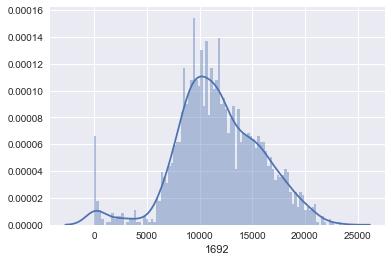

In [22]:
sns.set()
sns.distplot(series_1692, bins= 100)
plt.show()

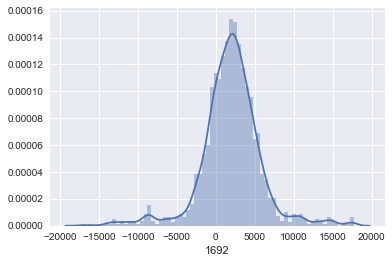

In [23]:
sns.distplot(series_1692_diff364, bins= 70)
plt.show()

In [24]:
gm= GaussianMixture(n_components= 2)
gm.fit(np.array(series_1692).reshape(-1, 1))
print('case {}: {}'.format(2, gm.aic(np.array(series_1692).reshape(-1, 1))))
print(gm.means_)

case 2: 37674.872753528776
[[ 10318.8576199 ]
 [ 14845.90153576]]


In [25]:
df_1692= data.data[frozenset({'weekday'})][['ds', 1692]].reset_index(drop= True)

In [26]:
df_1692= df_1692.join(pd.DataFrame(gm.predict_proba(np.array(series_1692).reshape(-1, 1)))[1])

In [27]:
gm= GaussianMixture(n_components= 2)
gm.fit(np.array(series_1692_diff364).reshape(-1, 1))
print('case {}: {}'.format(2, gm.aic(np.array(series_1692_diff364).reshape(-1, 1))))
print(gm.means_)

case 2: 30087.43294491523
[[ 2048.51172006]
 [ 1697.48815487]]


In [28]:
df_1692_diff364= data.data[frozenset({'weekday'})][['ds', 1692]].reset_index(drop= True)

In [29]:
df_1692_diff364= df_1692_diff364[364:].reset_index(drop= True).join(pd.DataFrame(gm.predict_proba(np.array(series_1692_diff364).reshape(-1, 1)))[1])

In [30]:
df_1692[df_1692[1] > 0.7][-90:-60]

,ds,1692,1
1813,2017-06-13,19056,0.827019
1814,2017-06-14,17705,0.758638
1816,2017-06-16,21631,0.907935
1817,2017-06-19,18095,0.780588
1820,2017-06-22,18273,0.789992
1821,2017-06-23,20846,0.888789
1823,2017-06-27,18494,0.801147
1825,2017-06-29,19423,0.842093
1826,2017-06-30,17410,0.740779
1828,2017-07-04,20105,0.866636


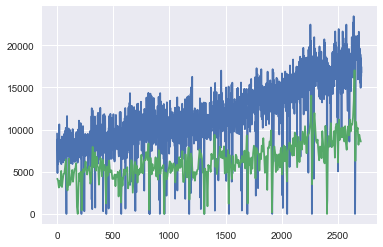

In [31]:
data.data[frozenset({'weekday'})][1692].plot()
data.data[frozenset({'sat'})][1692].plot()
plt.show()